In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from astropy.table import Table
from decimal import *

In [2]:
Data = pd.read_csv('/Users/Jackroberson/Downloads/dump_spectra_2.dat.txt', delim_whitespace = True)

In [3]:
tab = pd.DataFrame(Data)
#with pd.option_context('display.float_format', '{:0.80f}'.format):
   # print(tab)


tab.head()
pl
#pd.options.display.max_columns = None

#Data.head()
#tab.shape
#tab


,#,Wavelength,Flux-Dens,Flux-Dens.1
0,4.20000,0.0,0.0,NaN
1,4.20002,0.0,0.0,NaN
2,4.20004,0.0,0.0,NaN
3,4.20006,0.0,0.0,NaN
4,4.20008,0.0,0.0,NaN


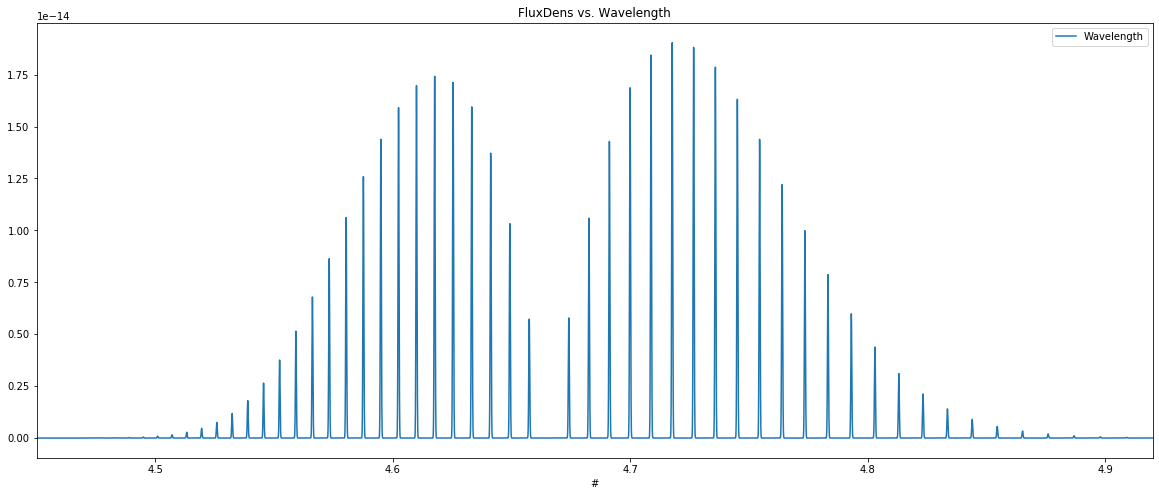

In [4]:
plt.xlim = (4, 5)
tab.plot(x = '#', y = 'Wavelength', title = 'FluxDens vs. Wavelength', figsize = (20, 8), xlim=(4.45, 4.92), )

In [5]:
wl = tab['#'].tolist()  # Create list of wavelength values
fd = tab['Wavelength'].tolist() # '' for flux-density

assert len(wl) == 55001 # check if list length is correct

In [6]:
print(min(fd), max(fd))

0.0 1.9041e-14


In [7]:
from scipy.signal import find_peaks
from scipy.misc import electrocardiogram


#x = fd[14000: 36000]
#peaks, _ = find_peaks(x, height = 10**-14)
#plt.plot(x)
#plt.plot(peaks, x[peaks], "x")
#plt.plot(np.zeros_like(x), "--", color = "grey", figsize = (20, 8))
#plt.show()

def merge(x, y):
    ord_pair = [(x[i], y[i]) for i in range(0, len(x))]
    return ord_pair

wl_pos = wl[14000:36000] 
fd_pos = fd[14000:36000]

pairs = merge(wl_pos, fd_pos)

peak_coord = [] # coordinate pairs that make up an individual peak
WL = []           # list of wavelength values that correspond to flux peaks
FD = []          # flux density values corresponding to flux peaks

for i in pairs:
    if i[1] > 1e-17:        #0.002e-14 is the peak threshold 
        peak_coord.append(i)         
        WL.append(i[0])
        FD.append(i[1])


n = len(FD)
#print('Index of flux density peaks are: ', findPeaks(FD, n))
    
    

        
#len(fd_1)

#print(fd_1)
#fd_1.sort()

#print(wl_pos)

#sort_FD = sorted(FD, reverse = True)  #sort flux density values from greatest --> least

#FD_peaks = sort_FD[0:46]

#print(FD_peaks) 
len(FD)


3276

In [8]:
pip install lmfit

Note: you may need to restart the kernel to use updated packages.


In [9]:
from scipy import integrate, optimize
from numpy import exp, linspace, random
from lmfit import Model
from numpy import trapz
from scipy.signal import argrelextrema


print('The total emitted flux is: ', integrate.simps(fd, wl))

The total emitted flux is:  1.9123294980375043e-16


In [10]:
type(fd_pos)

fd_arr = np.asarray(fd_pos) # turn flux density values to array
FD_arr = np.asarray(FD)
centroid_ind = argrelextrema(FD_arr, np.greater, order = 1) # function returns indices of local maxima within flux density list
aa = find_peaks(fd_arr) # alternative method for finding centroid wavelength indices

In [11]:
#print(centroid_ind_list)
#centroid_ind_arr = np.asarray(centroid_ind)
#print(list(centroid_ind))
#print(centroid_ind_arr)

centroid_ind_list = np.array(centroid_ind).tolist()
#print(centroid_ind_list)
#centroid_ind_list[0]

In [12]:
cent_coord = [] # coordinates containing centroid wavelength
for x in centroid_ind_list[0]:
    cent_coord.append(pairs[x])

cent_wl = [] # centroid wavelengths

for i in cent_coord:
    if i[1] > 1e-17:
        cent_wl.append(i)
        
cent_wl_arr = np.asarray(cent_wl)
    
#print(cent_wl)
len(cent_wl)

peak_coord_fd = [i[1] for i in peak_coord] # flux density values above the threshold 1e-17

peak_coord_fd_arr = np.asarray(peak_coord_fd) # turn to array

bounds_for_int = argrelextrema(FD_arr, np.less, order = 1) # obtain bounds for integrating



#for x in peak_coord


ee = np.array(bounds_for_int).tolist()
print()
#print(ee)
#len(ee[0])

bounds_coord = [] # coordinates of local minima, serving as bounds for integrating

for x in ee[0]:
    bounds_coord.append(pairs[x])
    
#print(bounds_coord)
print()
print()
#print(cent_coord)

test_scatt = sorted(bounds_coord + cent_coord)

x_int = [i for i in bounds_coord] # x-coord for minima

#print(test_scatt)
#type(bounds_for_int)
#print(cent_wl_arr)
print(centroid_ind_list)
print()
print(ee)
print()
#print(bounds_for_int)
#len(ee[0])





[[6, 27, 57, 95, 138, 185, 236, 291, 348, 409, 472, 538, 606, 676, 746, 819, 892, 1040, 1115, 1191, 1267, 1342, 1417, 1492, 1563, 1634, 1705, 1780, 1933, 2012, 2089, 2168, 2246, 2323, 2399, 2475, 2550, 2623, 2695, 2767, 2835, 2963, 3023, 3080, 3132, 3180, 3223, 3259]]

[[14, 40, 75, 115, 160, 209, 262, 319, 378, 440, 504, 571, 640, 711, 782, 855, 928, 1003, 1077, 1153, 1229, 1304, 1380, 1455, 1528, 1598, 1668, 1742, 1818, 1895, 1972, 2050, 2129, 2207, 2284, 2361, 2437, 2513, 2587, 2660, 2731, 2801, 2868, 2933, 2994, 3053, 3107, 3157, 3203, 3243]]



In [27]:
def flux_peaks_2(i: list, j: list, k: list) -> float:
    """Takes flux density and wavelengths list, along with lists of bounds for integration 
    and calculates individual integrals to get fluxes."""
    fluxes = []
    for x in range(0, len(j) - 1):
        fluxes.append(integrate.simps(np.asarray(i[j[x]: j[x + 1]]), np.asarray(k[j[x]: j[x + 1]])))
    flux_list = { (i + 1) : fluxes[i] for i in range(0, len(fluxes))}
    
    return  fluxes
        

In [68]:
Fluxes_2 = flux_peaks_2(FD, ee[0], WL)# These are my final integrated flux peaks

Fluxes_3 = [float(x) for x in Fluxes_2 if x >= 0]

        

In [15]:
print('Centroid Wavelengths: ', [WL[x] for x in centroid_ind_list[0]])

Centroid Wavelengths:  [4.48324, 4.48906, 4.49496, 4.50096, 4.50706, 4.513240000000001, 4.51952, 4.5259, 4.53236, 4.53894, 4.5456, 4.55236, 4.55922, 4.56618, 4.57322, 4.58038, 4.58764, 4.6024400000000005, 4.61, 4.61766, 4.62542, 4.63328, 4.64124, 4.6493199999999995, 4.6574800000000005, 4.67416, 4.68264, 4.6912400000000005, 4.70876, 4.7177, 4.726719999999999, 4.73588, 4.74514, 4.7545, 4.76398, 4.77358, 4.7833, 4.79312, 4.803059999999999, 4.81314, 4.82332, 4.8440199999999995, 4.85456, 4.86524, 4.87602, 4.88692, 4.897959999999999, 4.90912]


(0, 1e-17)

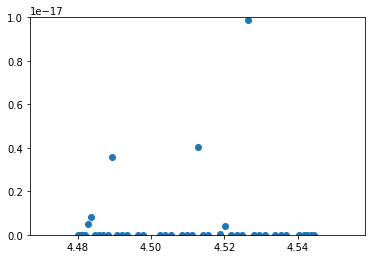

In [18]:
xs = [i[0] for i in cent_coord]
ys = [i[1] for i in cent_coord]
plt.scatter(xs, ys)
plt.ylim(0, 1e-17)



(1e-17, 2e-17)

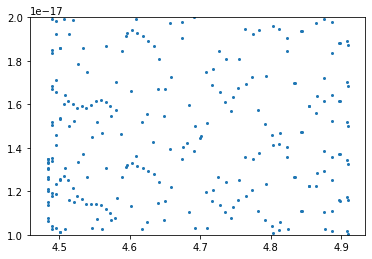

In [19]:
plt.scatter(WL, FD, s = 4)
plt.ylim(1e-17, 2e-17)

In [22]:
Data_3 = pd.read_csv('/Users/Jackroberson/Downloads/dump_lines_001.dat.txt', delim_whitespace = True)

tab_3 = pd.DataFrame(Data_3)

tab_3.head()

,Upper,Lower,Lambda,Tau,Intensity,A_ul,E_up,g_up
0,3_R_13-,3_R_13,191.228311,9.374E-23,0.000000e+00,0.000023,9701.436,29.0
1,2_R_13-,2_R_13,189.453054,9.809E-16,6.509000e-19,0.000074,6699.155,29.0
2,1_R_13-,1_R_13,187.710348,8.235E-09,6.006000e-12,0.000157,3658.870,29.0
3,0_R_13-,0_R_13,185.999294,6.839E-02,4.997000e-05,0.000274,580.487,29.0
4,3_R_14-,3_R_14,178.513663,7.145E-23,0.000000e+00,0.000028,9782.033,31.0


In [54]:
A_ul = list(tab_3['A_ul'])
E_up = list(tab_3['E_up'])
g_up = list(tab_3['g_up'])
Wavelength = list(tab_3['Lambda'])
type(Fluxes_3[0])

numpy.float64

In [61]:
from scipy.constants import h, c
pi = math.pi
Planck = h
speed = c


6.62607004e-34


In [66]:
def ln_Pop(a: list, b: list, c: list, d:list) -> list:
    LN = []
    for (w, x, y, z) in zip(a, b, c, d):
        LN.append(math.log((4 * pi * w * speed)/(Planck * x * y * z)))
        
    return LN

In [79]:
t = ln_Pop(Fluxes_3, Wavelength, A_ul, g_up)
print(t)

hg = []
for x in Fluxes_3:
    hg.append((Planck * speed)/ x)
    


[54.47433758738896, 54.72493732782082, 56.59500255374647, 56.46810741627856, 59.12557476019085, 57.36332228998275, 57.24325023393041, 57.1470616051531, 60.14645970418645, 58.89094003279973, 58.24853262692859, 57.90429761963139, 60.60564712214614, 59.369684244728056, 58.74958917707331, 58.17997719651124, 60.33165232011972, 59.11987169153081, 58.07179750669311, 56.489711316975004, 59.681901673370994, 58.83846584865492, 58.0362076394529, 57.95483096048893, 60.2837823343692, 58.848382438361135, 58.34535925128724, 57.69545041235248, 59.589763984472995, 58.349778995406076, 57.33732528341123, 56.83673031280227, 59.047233070524754, 57.480417820347974, 55.08293399963427, 54.54843578524362, 56.07809632450873, 54.25955377952776]


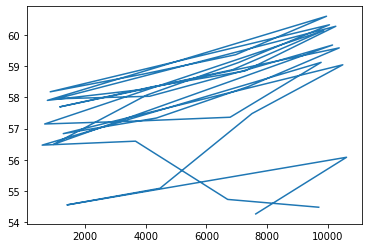

In [82]:
plt.plot(E_up[0:38], t)